### ✅ **Spell Checker**

run: cspell repos_temp/*.py > typos.txt

In [45]:
typos_freq = {}
custom_dict = set(["javadoc", "reference", "devs", ])

# Read typos.txt into memory
with open('data/typos.txt', 'r') as f:
    for line in f:
        line = line.strip().split()
        typo = line[4][1:-1].lower()
        # print(typo)

        # Skip if typo is in custom dict
        if typo in custom_dict:
            continue

        # Add typo to dict
        typos_freq[typo] = typos_freq.get(typo, 0) + 1

typos_freq = sorted(typos_freq.items(), key=lambda x: x[1], reverse=True)

# Write typos_freq to file
with open('data/typos_freq.txt', 'w') as f:
    for typo, freq in typos_freq:
        f.write(f'{typo} {freq}\n')

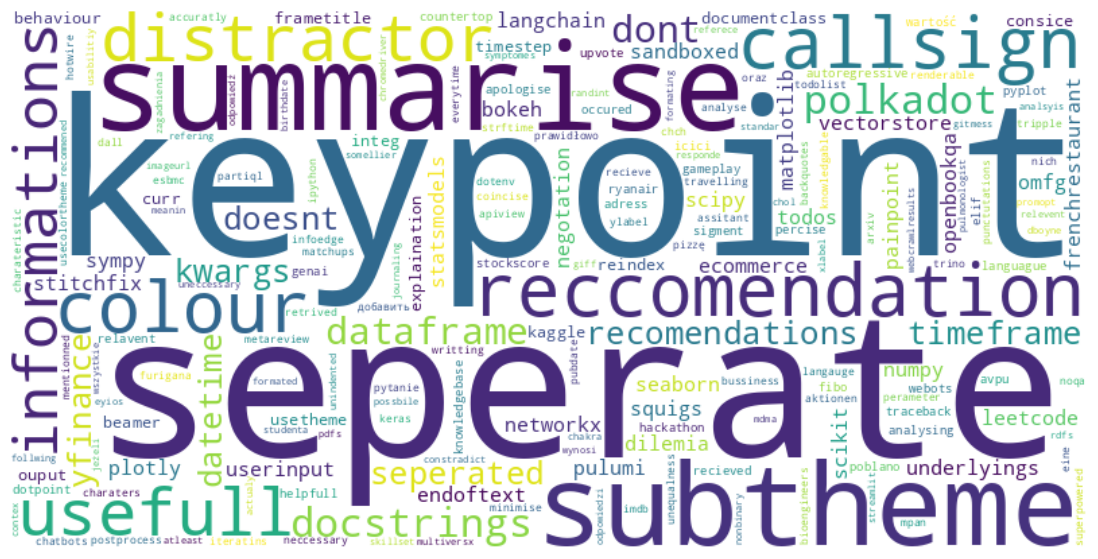

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a list of words
words = []
for typo, freq in typos_freq:
    lst = [typo] * freq
    words.extend(lst)

# Join the list into a single string with spaces, as wordcloud takes in a string
words_string = ' '.join(words)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(words_string)

# Display the word cloud using matplotlib
wordcloud.to_file('images/typos_cloud.png')
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()